In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys  
sys.path.insert(1, '/Users/frederiekelohmann/Documents/FS2024/DSL/DSL_Quake_Fault_Reconstruction/src')

from main import run_fault_reconstruction

In [12]:
def plot_3Ddataset(X: np.ndarray,
                 labels: np.ndarray):
    
    '''
    Create every 2D combination plot from 3D data, colored according to labels
    '''
    
    fig, ax = plt.subplots(2,2)
    fig.set_figwidth(10)
    fig.set_figheight(10)

    marker_sz = 4

    ax[0,0].scatter(X[:,0], X[:,1], s=marker_sz, c=labels)
    ax[0,1].scatter(X[:,2], X[:,1], s=marker_sz, c=labels)
    ax[1,0].scatter(X[:,0], X[:,2], s=marker_sz, c=labels)

    ax[0,0].set_xlabel('x')
    ax[0,0].set_ylabel('y')
    ax[0,1].set_xlabel('z')
    ax[0,1].set_ylabel('y')
    ax[1,0].set_xlabel('x')
    ax[1,0].set_ylabel('z')    

    ax[1,1].axis('off')

    plt.show()

## Test on a Synthetic Dataset

In [4]:
ground_truth = np.load('../data/synthetics_31.npy')

In [5]:
y_true = []
cts_true = []
for i in range(len(ground_truth)):

    y_true += [i]*len(ground_truth[i])
    cts_true.append(len(ground_truth[i]))


X = np.concatenate(ground_truth, axis = 0)

In [7]:
kernels, labels = run_fault_reconstruction(X, min_sz_cluster = 4)

Processing chunk 1/1 with 400 points
  Fit 63 Gaussian and 1 background kernels
  BIC: 2337.118249562775
Number of nans in gain 0.0/2016.0
  37/2016 pairs have touching bbox
  Removed 0/37 candidate pairs with negative gain
  Merged 12 pairs  >> 52 kernels left
  BIC: 2052.7240395489107
Number of nans in gain 776.0/1326.0
  51/550 pairs have touching bbox
  Removed 0/51 candidate pairs with negative gain
  Merged 5 pairs  >> 47 kernels left
  BIC: 1931.2866599430422
Number of nans in gain 839.0/1081.0
  58/242 pairs have touching bbox
  Removed 1/58 candidate pairs with negative gain
  Merged 6 pairs  >> 41 kernels left
  BIC: 1811.2672920216537
Number of nans in gain 574.0/820.0
  56/246 pairs have touching bbox
  Removed 2/56 candidate pairs with negative gain
  Merged 3 pairs  >> 38 kernels left
  BIC: 1735.2335444855303
Number of nans in gain 571.0/703.0
  51/132 pairs have touching bbox
  Removed 4/51 candidate pairs with negative gain
  Merged 3 pairs  >> 35 kernels left
  BIC: 1

### Plot the cluster assignment of the algorithm


We can see here one of the problems of using Gaussians in the algorithm: The yellow cluster contains datapoints from 2 faults in the ground truth

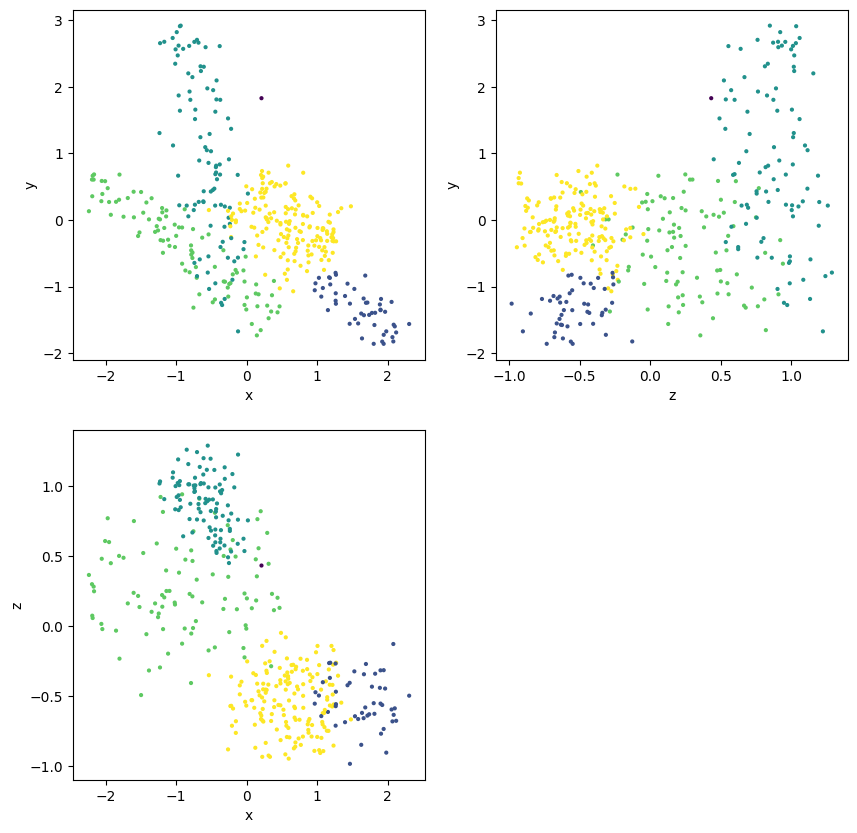

In [13]:
plot_3Ddataset(X, labels)

### Plot the ground truth

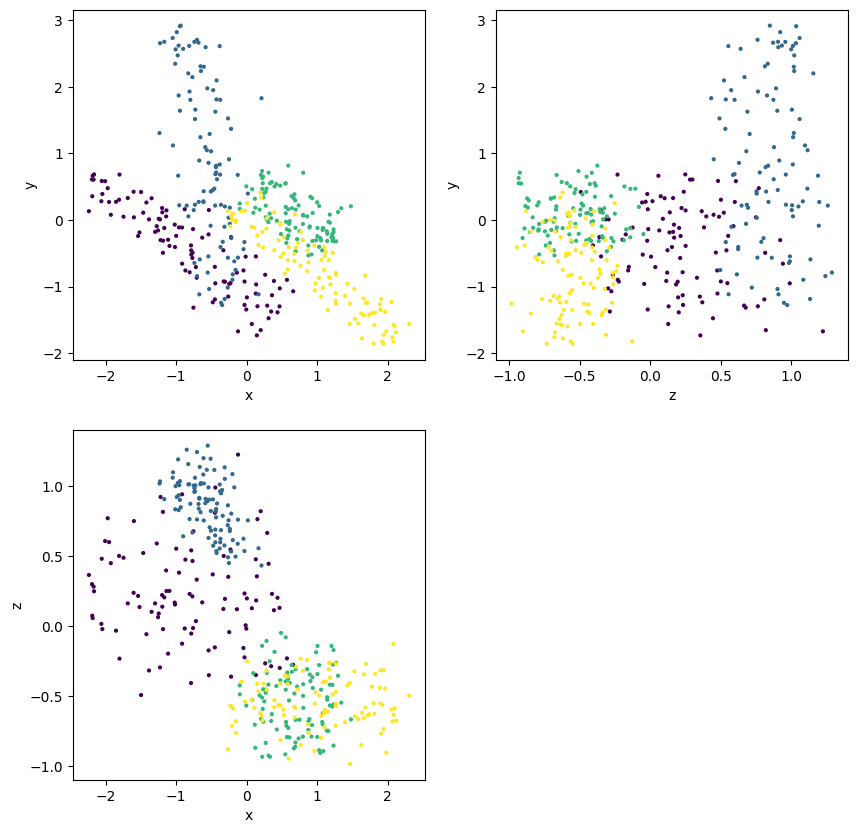

In [14]:
plot_3Ddataset(X, y_true)